# Customer Churn Prediction 
## Problem Statement:
The problem of churn is a problem when a number of individuals move out of a collective group. It is one of the main problems that determine the steady-state level of customers in any type of business.
Recently a large number of customers has left Telecom. To address this problem Telecom provides customer data to solve two important tasks:


### Descriptive task: 
Characterize loyal and churn customers and propose a focused customer retention program. (This can be done through visualization, descriptive models etc.)
 

### Predictive task: 
Find a model that identifies churn customers. 

Then:
- Select 300 customers using that model from a separate test set and report the number of true churn customers among them.
- Calculate the expected costs for  Telecom for one month when using your model on the test set if: every customer predicted as churn will get a gift of 10 euro and every true churn customer predicted as loyal will cause a loss of 64 euros (an average month subscription).

In [49]:
import pandas as pd 
import numpy as np 
from scipy import stats

# # Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px


from sklearn.model_selection import train_test_split


# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Import the dataset
data = pd.read_csv('../data/churn-train.csv')

# Data Exploration & Preprocessing

**Data exploration findings:**
- There are 10 duplicate rows in the data set that we need to remove them.

- The Churn feature is our target variable. It is a string with values 'Yes' or 'No'. Convert it to boolean variable.

- The data set contains several categorical variables, which are the object type.

- The SeniorCitizen feature represents if a customer is a senior citizen (i.e. age range < 67), where 1=True and 0=False. Let's convert it to object type and replace 0 with 'No' and 1 with 'Yes'.

- The totalCharges feature is the total amount charged to the customer. We need to convert it to numerical data type. Also, there are 6 missing values in the totalCharges feature, containg "?". We need to remove them as well.


In [51]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,61,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.2,No
1,Male,0,Yes,Yes,72,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,No
2,Female,0,No,No,5,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,No
3,Female,0,No,No,49,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,No
4,Male,0,No,No,8,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.9,No
5,Male,0,No,No,3,Yes,No,'Fiber optic',No,No,No,No,No,Yes,Month-to-month,Yes,'Electronic check',80.35,253.8,No
6,Male,0,Yes,Yes,9,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service','Two year',No,'Mailed check',19.60,197.4,No
7,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,Yes,No,No,No,No,'Two year',Yes,'Bank transfer (automatic)',54.20,3838.2,No
8,Male,0,No,No,46,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,'Credit card (automatic)',45.20,2065.15,No
9,Female,0,Yes,No,67,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,'One year',No,'Mailed check',75.10,5064.45,No


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-null   object 
 15  PaperlessBilling  4695 non-null   object 
 16  PaymentMethod     4695 non-null   object 


In [53]:
# Check for duplicated rows, no duplicated rows to deal with.
data.duplicated().sum()

10

In [54]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [55]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1423
TotalCharges        4429
Churn                  2
dtype: int64

In [57]:
for col in data.columns:
    print(f'\n{col} : {data[col].unique()}')
    print(f'{col} : {data[col].dtype}')


gender : ['Male' 'Female']
gender : object

SeniorCitizen : [0 1]
SeniorCitizen : int64

Partner : ['Yes' 'No']
Partner : object

Dependents : ['Yes' 'No']
Dependents : object

tenure : [61 72  5 49  8  3  9 67 46 55 33 62  1 14 18 64 69 71 66  2 11 47 35 32
 60 29 21 48 43 20 31 38 12  6 42 45 28  7 25 40 27 10  4 68 57 26 17 59
 30 50 15 70 53 56 24 39 13 41 44 34 23 52 16 36 65 58 37 63 22 19 51 54
  0]
tenure : int64

PhoneService : ['No' 'Yes']
PhoneService : object

MultipleLines : ["'No phone service'" 'Yes' 'No']
MultipleLines : object

InternetService : ['DSL' "'Fiber optic'" 'No']
InternetService : object

OnlineSecurity : ['Yes' 'No' "'No internet service'"]
OnlineSecurity : object

OnlineBackup : ['No' 'Yes' "'No internet service'"]
OnlineBackup : object

DeviceProtection : ['Yes' 'No' "'No internet service'"]
DeviceProtection : object

TechSupport : ['No' 'Yes' "'No internet service'"]
TechSupport : object

StreamingTV : ['No' 'Yes' "'No internet service'"]
StreamingTV : 

Here is a better overview of the data. We can see the unique values and the data type of each feature.

In [58]:
# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # coerce will replace the error with NaN

# Senior Citizen (age range < 67) : 0
data['SeniorCitizen'] = data['SeniorCitizen'].replace({0:'No',1:'Yes'})
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [59]:
# Check for missing values
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
Churn               0
dtype: int64

In [60]:
# Check again for duplicated rows
data.duplicated().sum()

0

In [61]:
# drop nan values
data.dropna(inplace = True)

In [62]:
# check again for missing values
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis (EDA)

In [63]:
# Create numeric & categorical lists
numeric_cols = []
categoric_cols = []

for col in data.columns:
    if data[col].dtype == 'object':
        # print(f'{col} : {data[col].unique()}')
        categoric_cols.append(col)
    else:
        # print(f'{col} : {data[col].dtype}')
        numeric_cols.append(col)


print('Numerical columns:', numeric_cols)
print('Categorical columns:', categoric_cols)

Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [64]:
# Summary statistics for numerical columns of the data
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,4679.000000,4679.000000,4679.000000
mean,32.414191,64.366681,2272.405599
std,24.481634,30.172836,2264.299883
min,1.000000,18.250000,18.850000
25%,9.000000,35.075000,401.725000
50%,29.000000,70.100000,1389.200000
75%,55.000000,89.750000,3754.800000
max,72.000000,118.750000,8684.800000


## Churn Analysis

Churn
No     3433
Yes    1246
Name: count, dtype: int64


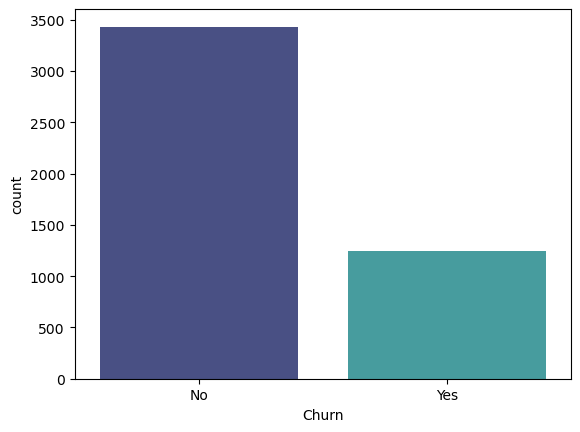

In [65]:
# # Countplot of churn feature
print(data['Churn'].value_counts())

sns.countplot(data, x='Churn', palette='mako')
plt.show()


In [66]:
len(data[data['Churn'] == 'Yes']) / len(data) * 100

26.629621714041463

- Of the 4,679 customers, the 26.62% are churned customers and the 73.37% are loyal customers.

* **The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.**

In [67]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,Yes,Yes,61,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.20,No
1,Male,No,Yes,Yes,72,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,No
2,Female,No,No,No,5,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,No
3,Female,No,No,No,49,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,No
4,Male,No,No,No,8,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.90,No


In [68]:
# Groupby Churn by total charges, monthly charges, tenure and plot the mean
data.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean()



,MonthlyCharges,TotalCharges
Churn,,
No,60.925299,2542.293038
Yes,73.848435,1528.807223


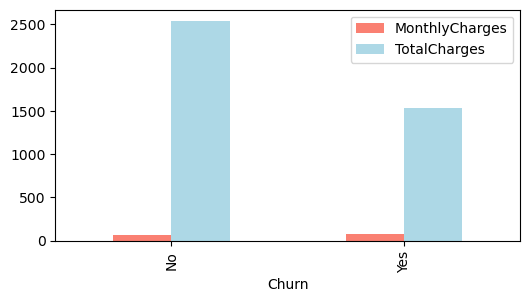

In [69]:
data.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean().plot(kind='bar', figsize=(6, 3), color=['salmon', 'lightblue']);

This table show the average TotalCharges, MonthlyCharges for churned and loyal customers. 

We can see that the average monthly charges for churned customers is higher than loyal customers. Also, the average tenure for churned customers is lower than loyal customers.

## Numerical Features Analysis

### Box Plots of Numerica Features

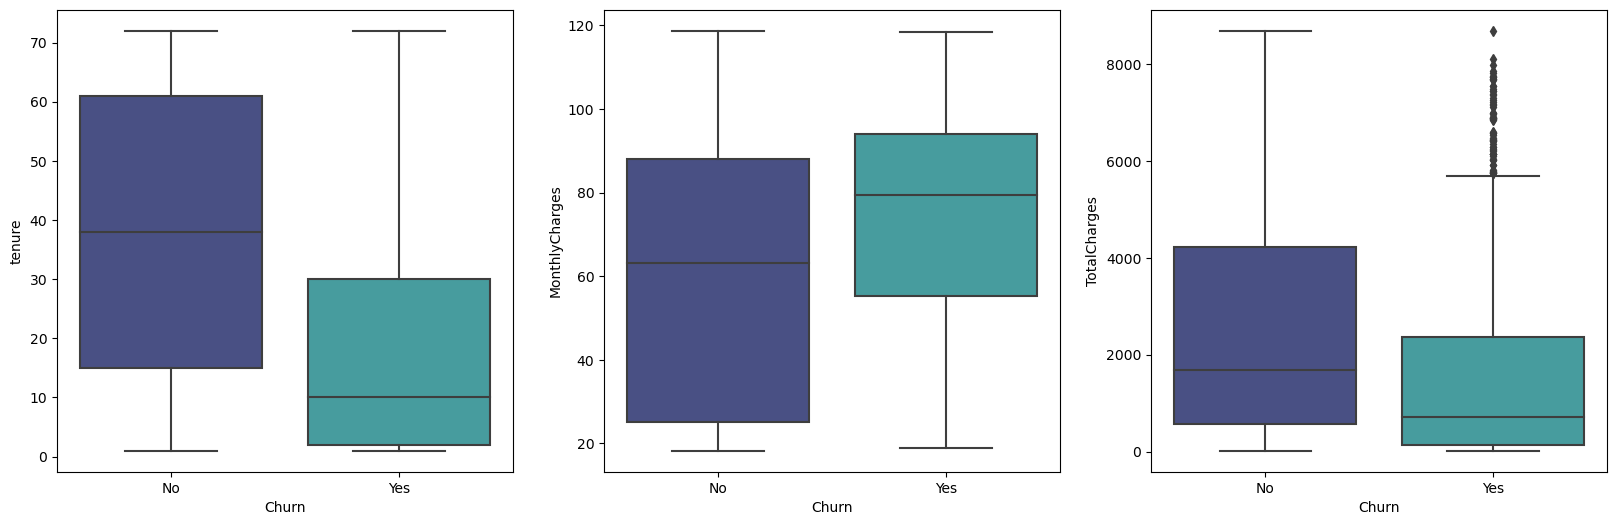

In [70]:
# Boxplot to visualize the distribution of tenure, monthly charges, total charges by churn
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(x="Churn", y="tenure", data=data, ax=ax[0], palette='mako')
sns.boxplot(x="Churn", y="MonthlyCharges", data=data, ax=ax[1], palette='mako')
sns.boxplot(x="Churn", y="TotalCharges", data=data, ax=ax[2], palette='mako')
plt.show()


### Pairplot of numerical features

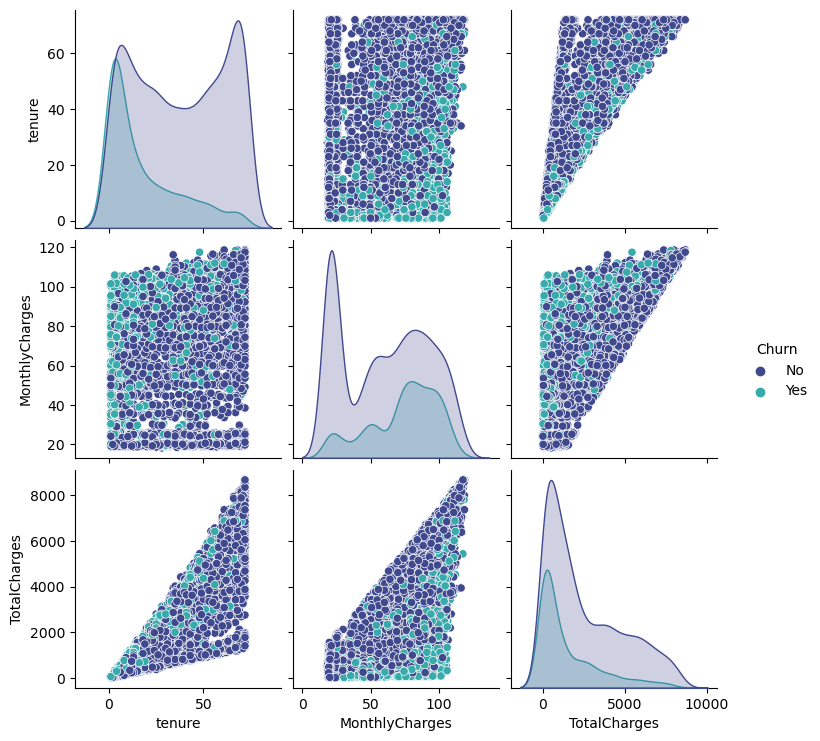

In [71]:
# Pairplot of numerical features (Hue as Churn)
sns.pairplot(data, hue='Churn', palette='mako')
plt.show()


### Distribution of Numerical Features

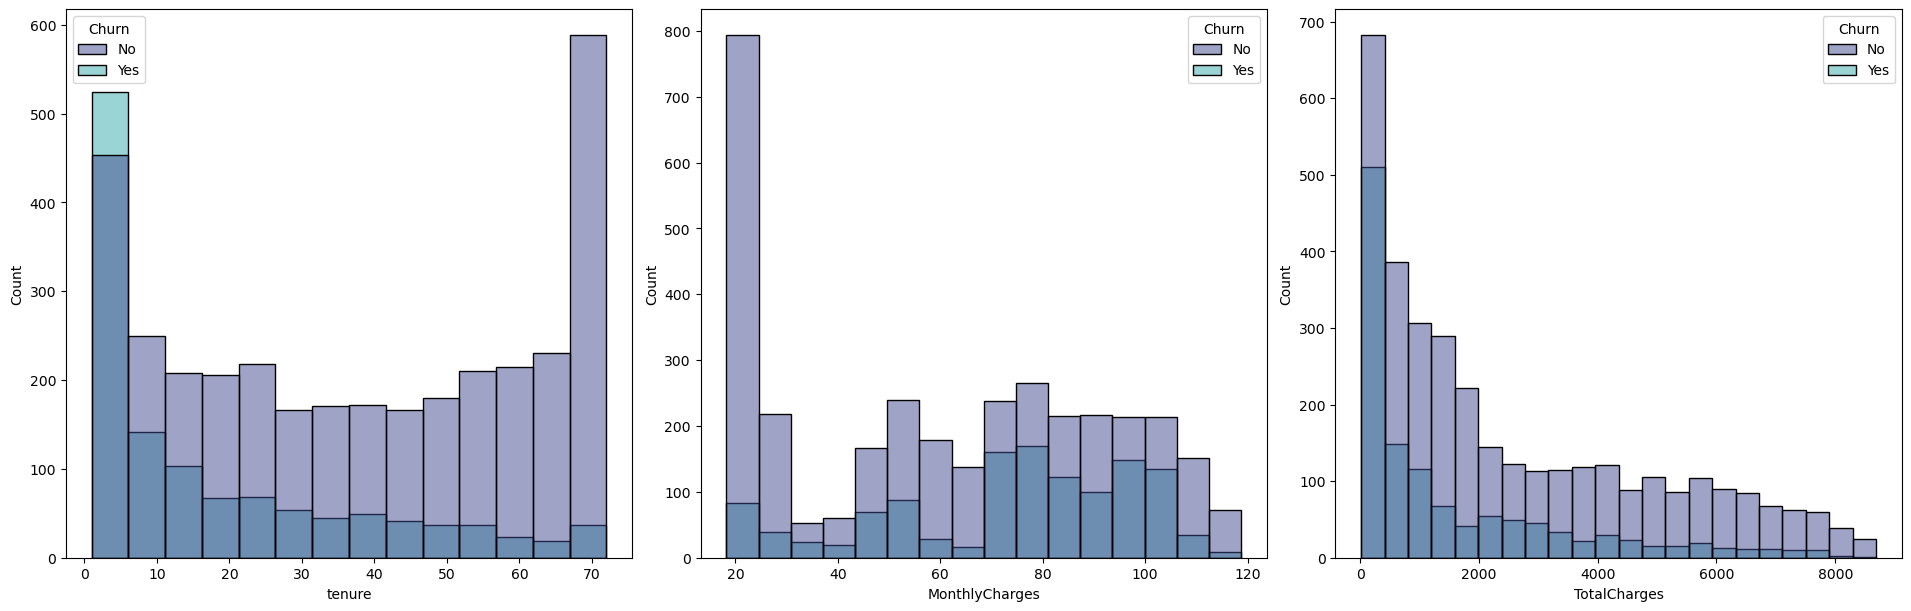

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(19, 6), constrained_layout=True)
sns.histplot(data, x='tenure', hue='Churn', ax=ax[0], palette='mako')
sns.histplot(data, x='MonthlyCharges', hue='Churn', ax=ax[1], palette='mako')
sns.histplot(data, x='TotalCharges', hue='Churn', ax=ax[2], palette='mako')
plt.show()


### Correlation Heatmap of Numerical Features

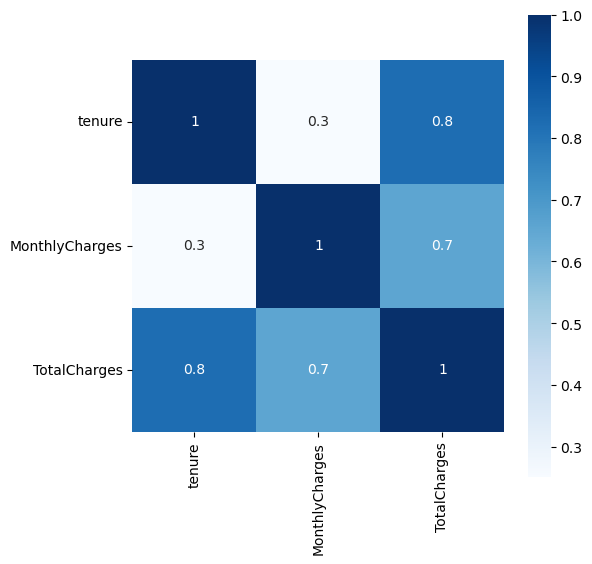

In [73]:
corr_matrix = data[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Generate a mask for the upper triangle if needed.
plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, square=True, fmt='.0g', cmap='Blues') # mask=mask
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Categorical Features Analysis

In [74]:
len(categoric_cols)

17

In [75]:
# Select categorical columns with test of independence with churn feature

# Chi-square test of independence
# H0: There is no relationship between the variables
# H1: There is a relationship between the variables
# Fail to reject H0 if p-value > 0.05 means there is no relationship between the variables
# Reject H0 if p-value < 0.05 means there is a relationship between the variables


# Create a function to perform chi-square test of independence
def chi_square_test_of_independence(data, target, categorical_cols, alpha=0.05):
    '''
    This function performs chi-square test of independence between categorical features and the target feature.
    
    Parameters:
    -----------
    data: DataFrame
        The dataset to be used
    target: str

    categorical_cols: list
        List of categorical columns to be used
    alpha: float

    Returns:
    --------
    A DataFrame of p-values and chi-square test statistic
    '''
    chi2_check = []
    p_value = []
    dof = []

    for i in categorical_cols:
        if stats.chi2_contingency(pd.crosstab(data[i], data[target]))[1] < alpha:
            chi2_check.append('Reject H0')
        else:
            chi2_check.append('Fail to reject H0')
        p_value.append(stats.chi2_contingency(pd.crosstab(data[i], data[target]))[1])
        dof.append(stats.chi2_contingency(pd.crosstab(data[i], data[target]))[2])

    chi_square_test = pd.DataFrame({'Categorical Variable': categorical_cols, 'Chi2-Test': chi2_check, 'P-Value': p_value, 'Degree of Freedom': dof})
    chi_square_test.sort_values(by='P-Value', ascending=True, inplace=True)
    chi_square_test.reset_index(drop=True, inplace=True)
    return chi_square_test

# Perform chi-square test of independence
chi_square_test_of_independence(data, 'Churn', categoric_cols)



,Categorical Variable,Chi2-Test,P-Value,Degree of Freedom
0,Churn,Reject H0,0.000000e+00,1
1,Contract,Reject H0,1.499508e-164,2
2,OnlineSecurity,Reject H0,2.389597e-121,2
3,TechSupport,Reject H0,1.355249e-110,2
4,InternetService,Reject H0,2.871664e-100,2
5,OnlineBackup,Reject H0,1.872954e-87,2
6,PaymentMethod,Reject H0,2.953691e-86,3
7,DeviceProtection,Reject H0,1.760135e-80,2
8,StreamingMovies,Reject H0,3.170017e-54,2
9,StreamingTV,Reject H0,3.718012e-53,2


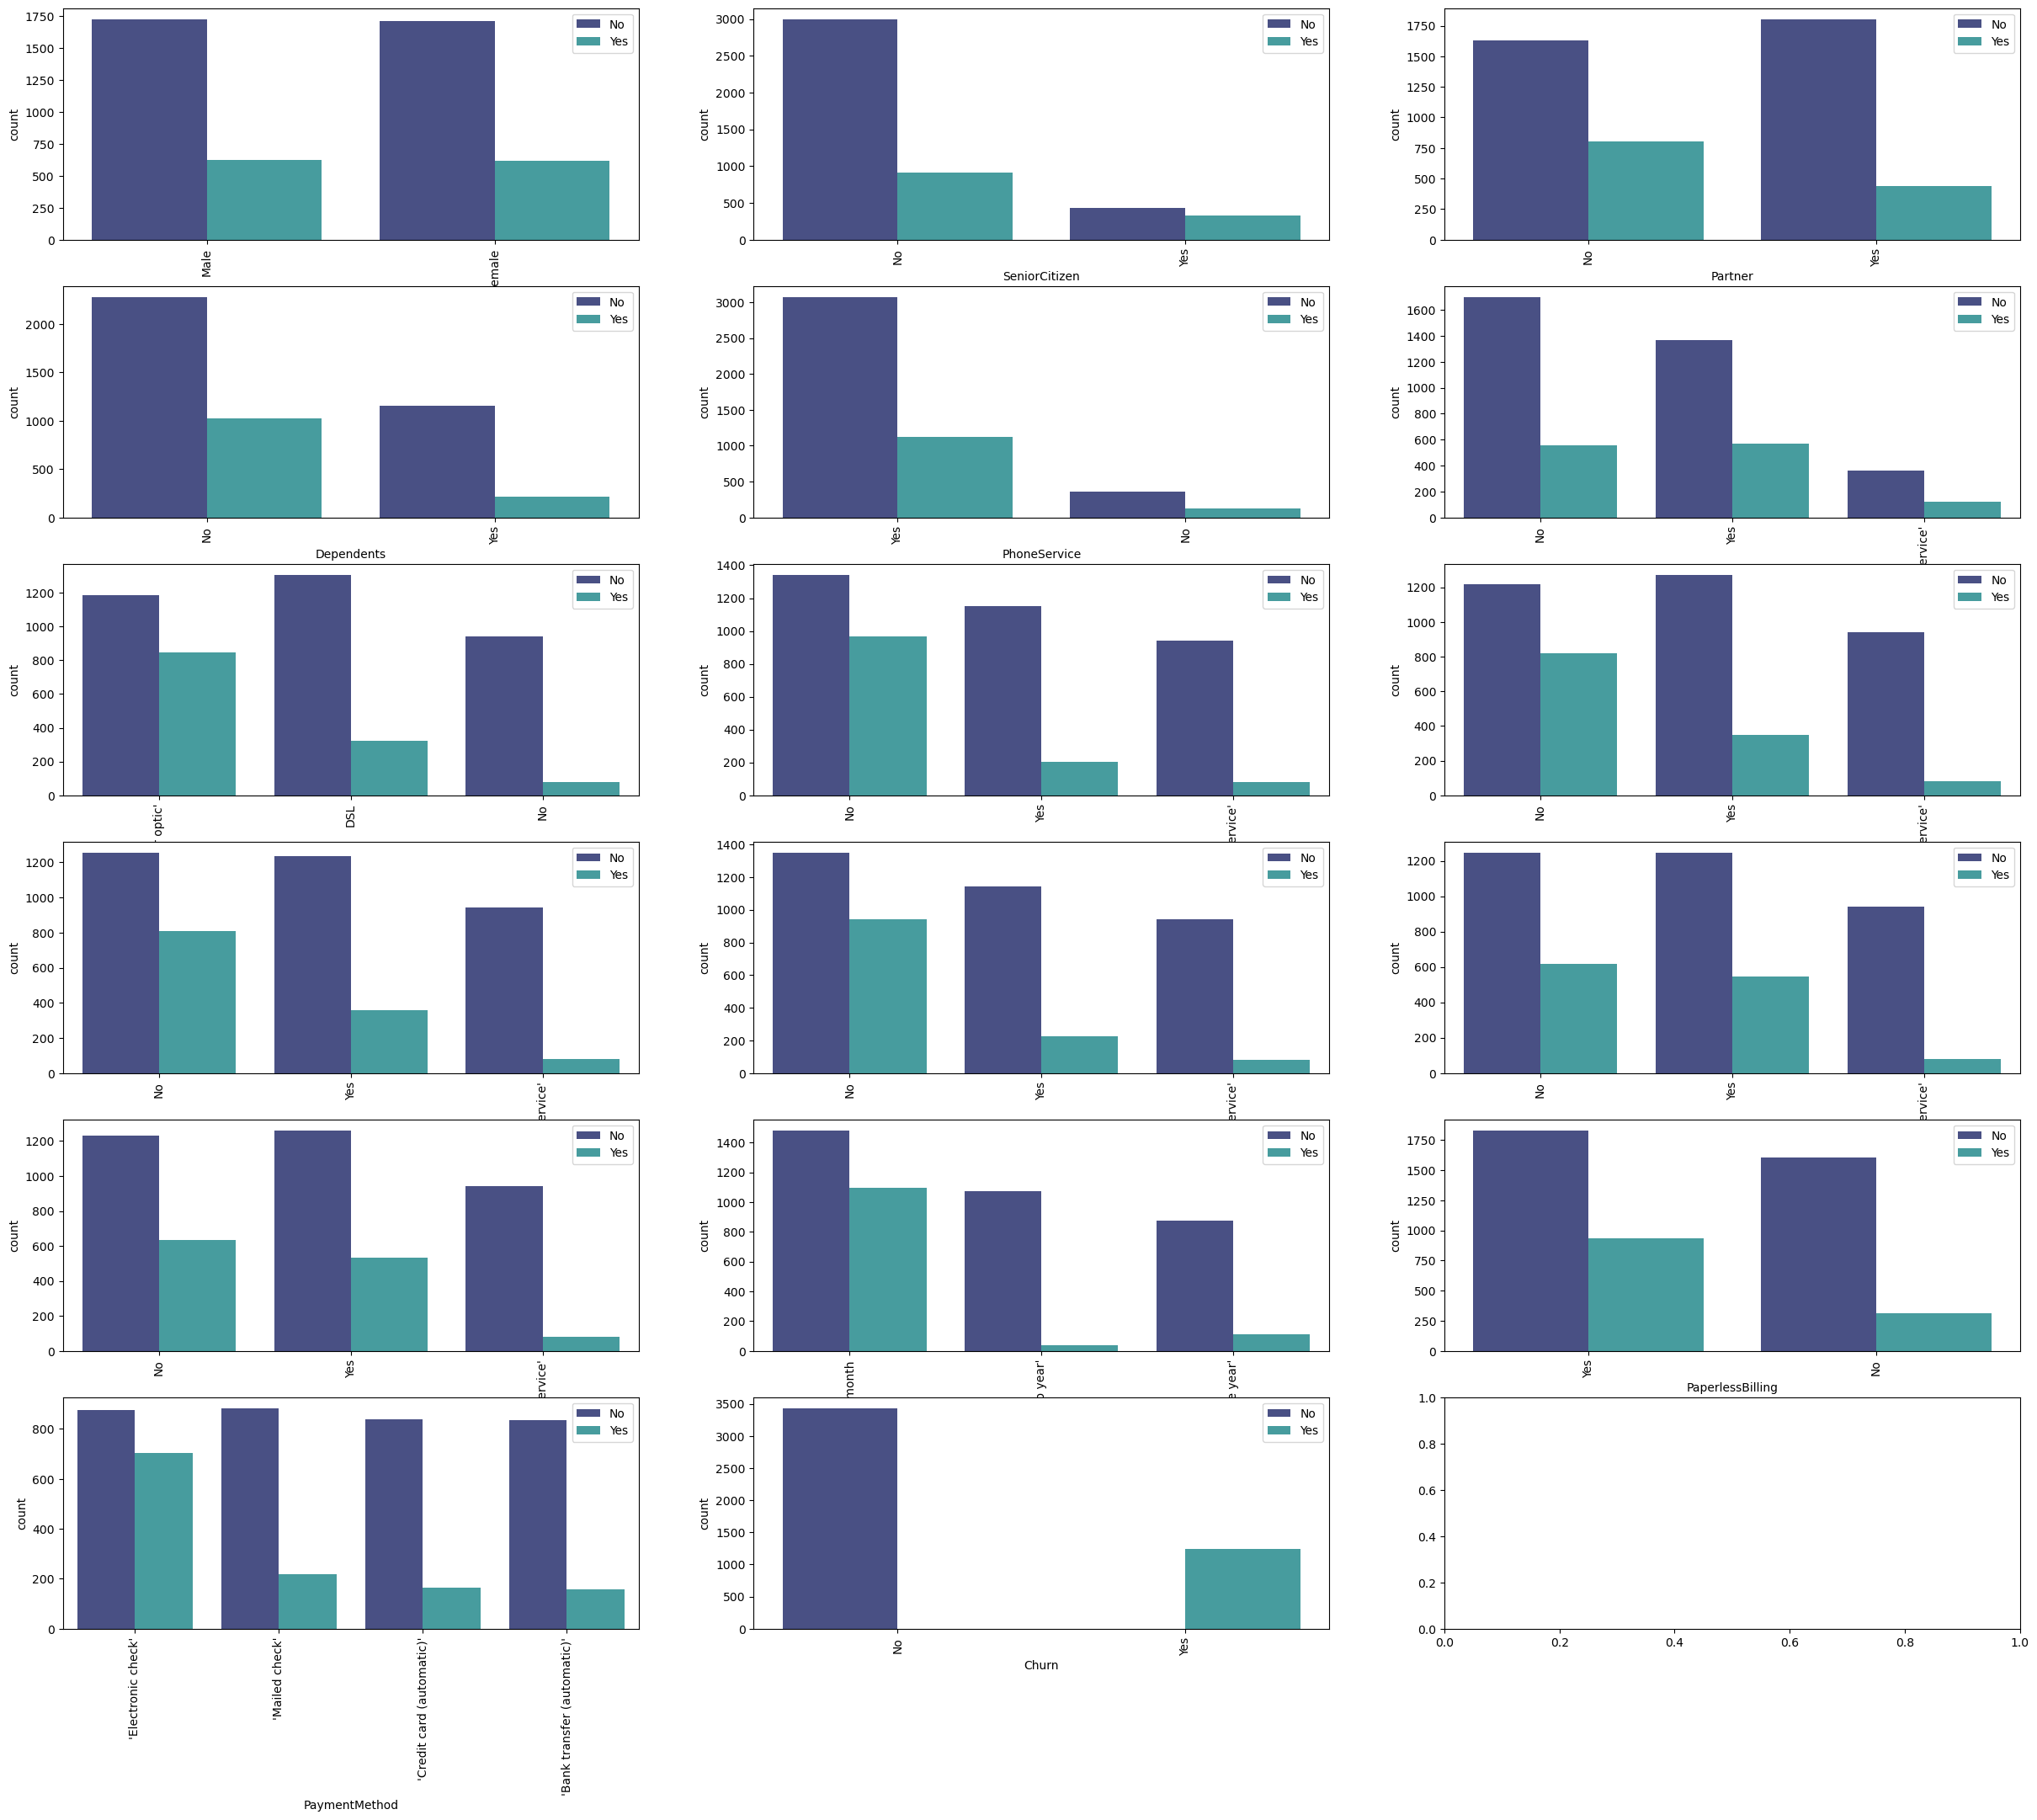

In [76]:
# for i in categoric_cols:
#     plt.figure(figsize=(6, 3))
#     sns.countplot(data=data, x=i, hue='Churn', order=data[i].value_counts().iloc[0:15].index , palette='mako')
#     plt.xticks(rotation=0)
#     plt.legend(loc='upper right')
#     plt.show()


# make those plots in a grid
fig, ax = plt.subplots(6, 3, figsize=(30, 25))
for i, subplot in zip(categoric_cols, ax.flatten()):
    sns.countplot(data=data, x=i, hue='Churn', order=data[i].value_counts().iloc[0:15].index , palette='mako', ax=subplot)
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90)
    subplot.legend(loc='upper right')

# Outliers Detection & Treatment

In [77]:
# z_thresh = 3 is a common value for removing outliers, but it is not a magic number. For example, if you have a dataset with 1000 samples, a z_thresh = 3 will remove 30 samples from your dataset.
print("Before dropping numerical outliers, length of the dataframe is: ",len(data))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(data)
print("After dropping numerical outliers, length of the dataframe is: ",len(data))


Before dropping numerical outliers, length of the dataframe is:  4679
After dropping numerical outliers, length of the dataframe is:  4679


# Dropping Highly Correlated Features (corr > 0.9)

In [78]:
print("The original dataframe has {} columns.".format(data.shape[1]))

# Calculate the correlation matrix and take the absolute value
corr_matrix = data[numeric_cols].corr().abs()


# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

data = data.drop(to_drop, axis=1)
print("The reduced dataframe has {} columns.".format(data.shape[1]))

The original dataframe has 20 columns.
The reduced dataframe has 20 columns.


# Dummy variable encoding for categorical features
We need to convert the categorical features to numerical features (i.e. dummy variables) for the predictive task.


In [79]:
# Transforming "Churn" feature rows into 0 and 1.
data['Churn'] = data['Churn'].map({'No':0, 'Yes':1}).astype('int')
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,Yes,Yes,61,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.20,0
1,Male,No,Yes,Yes,72,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,0
2,Female,No,No,No,5,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,0
3,Female,No,No,No,49,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,0
4,Male,No,No,No,8,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.90,0


In [80]:
# create dummy variables for categorical features
data = pd.get_dummies(data)
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,61,33.60,2117.20,0,False,True,True,False,False,True,...,False,False,False,True,True,False,True,False,False,False
1,72,90.45,6565.85,0,False,True,True,False,False,True,...,False,False,True,False,True,False,True,False,False,False
2,5,84.00,424.75,0,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,49,67.40,3306.85,0,True,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,8,19.70,168.90,0,False,True,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False


# Feature Scaling for numerical Features

In [84]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(data[columns].values.reshape(-1,1))

for i in data.select_dtypes(include=[np.number]).columns:
    data[i] = scaling(i)
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,0.845070,0.152736,0.242137,0.0,False,True,True,False,False,True,...,False,False,False,True,True,False,True,False,False,False
1,1.000000,0.718408,0.755486,0.0,False,True,True,False,False,True,...,False,False,True,False,True,False,True,False,False,False
2,0.056338,0.654229,0.046838,0.0,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,0.676056,0.489055,0.379416,0.0,True,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0.098592,0.014428,0.017315,0.0,False,True,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False


# Train-Test Split

In [85]:
# Split the data into train and test sets
X = data.drop(['Churn'],axis=1)
y = data['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [86]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3743, 936, 3743, 936)

# Over-sampling for class imbalance in "Churn" feature

In [89]:
data['Churn'].value_counts()

Churn
0.0    3433
1.0    1246
Name: count, dtype: int64

In [90]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(k_neighbors=5, random_state=123)

from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=123)


In [91]:
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (3743, 46)
Before OverSampling, the shape of y_train: (3743,)
After OverSampling, the shape of X_train_over: (5540, 46)
After OverSampling, the shape of y_train_over: (5540,)


In [92]:
y_train_over.value_counts()

Churn
0.0    2770
1.0    2770
Name: count, dtype: int64

Continue to Modeling notebook.

In [101]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)
y_pred = log_reg.predict(X_test)
print('Accuracy score of Logistic Regression Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Logistic Regression Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Logistic Regression Classifier on test set:\n', classification_report(y_test, y_pred))



Accuracy score of Logistic Regression Classifier on test set: 0.74
Confusion matrix of Logistic Regression Classifier on test set:
 [[479 184]
 [ 57 216]]
Classification report of Logistic Regression Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.89      0.72      0.80       663
         1.0       0.54      0.79      0.64       273

    accuracy                           0.74       936
   macro avg       0.72      0.76      0.72       936
weighted avg       0.79      0.74      0.75       936



In [102]:
# cross validation
cv_scores = cross_val_score(log_reg, X_train_over, y_train_over, cv=10)
print('Cross validation accuracy scores of Logistic Regression Classifier on training set:\n', cv_scores)


Cross validation accuracy scores of Logistic Regression Classifier on training set:
 [0.77978339 0.77436823 0.74548736 0.74729242 0.74187726 0.75090253
 0.76714801 0.78519856 0.76714801 0.72202166]


In [100]:
print('Mean cross validation accuracy score of Logistic Regression Classifier on training set: {:.2f}'.format(cv_scores.mean()))

Mean cross validation accuracy score of Logistic Regression Classifier on training set: 0.76


In [103]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_over, y_train_over)
y_pred = rf_clf.predict(X_test)
print('Accuracy score of Random Forest Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Random Forest Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Random Forest Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
cv_scores = cross_val_score(rf_clf, X_train_over, y_train_over, cv=10)
print('Cross validation accuracy scores of Random Forest Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of Random Forest Classifier on training set: {:.2f}'.format(cv_scores.mean()))



Accuracy score of Random Forest Classifier on test set: 0.78
Confusion matrix of Random Forest Classifier on test set:
 [[580  83]
 [124 149]]
Classification report of Random Forest Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       663
         1.0       0.64      0.55      0.59       273

    accuracy                           0.78       936
   macro avg       0.73      0.71      0.72       936
weighted avg       0.77      0.78      0.77       936

Cross validation accuracy scores of Random Forest Classifier on training set:
 [0.89711191 0.87725632 0.89530686 0.91877256 0.92779783 0.93140794
 0.92238267 0.92057762 0.91877256 0.90794224]
Mean cross validation accuracy score of Random Forest Classifier on training set: 0.91


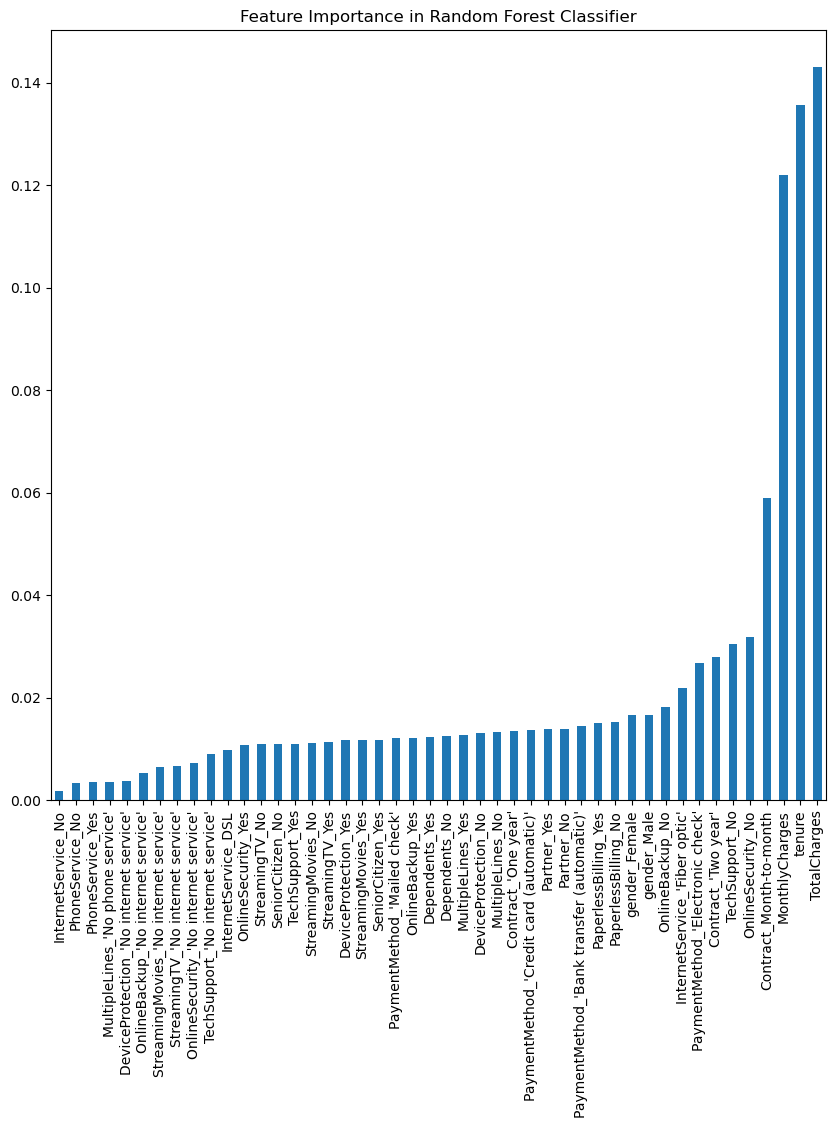

In [108]:
plt.figure(figsize=(15, 5))
weights_RF = pd.Series(rf_clf.feature_importances_,index=X.columns)
weights_RF.sort_values(ascending=True).plot(kind='bar', figsize=(10, 10))
plt.title('Feature Importance in Random Forest Classifier')
plt.show()


In [109]:
# Choose the best features from Random Forest Classifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_over, y_train_over)
sel.get_support()

selected_feat= X_train_over.columns[(sel.get_support())]
len(selected_feat)

print(selected_feat)



Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_'Fiber optic'', 'OnlineSecurity_No', 'TechSupport_No',
       'Contract_'Two year'', 'Contract_Month-to-month',
       'PaymentMethod_'Electronic check''],
      dtype='object')


In [110]:
# Logistic Regression with selected features
log_reg = LogisticRegression()
log_reg.fit(X_train_over[selected_feat], y_train_over)
y_pred = log_reg.predict(X_test[selected_feat])
print('Accuracy score of Logistic Regression Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Logistic Regression Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Logistic Regression Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
cv_scores = cross_val_score(log_reg, X_train_over[selected_feat], y_train_over, cv=10)
print('Cross validation accuracy scores of Logistic Regression Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of Logistic Regression Classifier on training set: {:.2f}'.format(cv_scores.mean()))


Accuracy score of Logistic Regression Classifier on test set: 0.73
Confusion matrix of Logistic Regression Classifier on test set:
 [[474 189]
 [ 61 212]]
Classification report of Logistic Regression Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.89      0.71      0.79       663
         1.0       0.53      0.78      0.63       273

    accuracy                           0.73       936
   macro avg       0.71      0.75      0.71       936
weighted avg       0.78      0.73      0.74       936

Cross validation accuracy scores of Logistic Regression Classifier on training set:
 [0.77797834 0.75270758 0.75812274 0.7400722  0.73104693 0.73465704
 0.74909747 0.79783394 0.74368231 0.71299639]
Mean cross validation accuracy score of Logistic Regression Classifier on training set: 0.75


In [112]:
# Hyperparameter tuning for Logistic Regression with GridSearchCV
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=10)
log_reg_cv.fit(X_train_over[selected_feat], y_train_over)
print('Tuned Logistic Regression Parameters: {}'.format(log_reg_cv.best_params_))
print('Best score is {}'.format(log_reg_cv.best_score_))

# Logistic Regression with tuned hyperparameters
log_reg = LogisticRegression(C=0.1)
log_reg.fit(X_train_over[selected_feat], y_train_over)
y_pred = log_reg.predict(X_test[selected_feat])

print('Accuracy score of Logistic Regression Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Logistic Regression Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Logistic Regression Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
cv_scores = cross_val_score(log_reg, X_train_over[selected_feat], y_train_over, cv=10)
print('Cross validation accuracy scores of Logistic Regression Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of Logistic Regression Classifier on training set: {:.2f}'.format(cv_scores.mean()))


Tuned Logistic Regression Parameters: {'C': 10}
Best score is 0.7503610108303249
Accuracy score of Logistic Regression Classifier on test set: 0.73
Confusion matrix of Logistic Regression Classifier on test set:
 [[475 188]
 [ 62 211]]
Classification report of Logistic Regression Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.88      0.72      0.79       663
         1.0       0.53      0.77      0.63       273

    accuracy                           0.73       936
   macro avg       0.71      0.74      0.71       936
weighted avg       0.78      0.73      0.74       936

Cross validation accuracy scores of Logistic Regression Classifier on training set:
 [0.77436823 0.74909747 0.76173285 0.73646209 0.72202166 0.74187726
 0.74548736 0.79602888 0.7400722  0.70938628]
Mean cross validation accuracy score of Logistic Regression Classifier on training set: 0.75


In [111]:
# Random Forest Classifier with selected features
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_over[selected_feat], y_train_over)
y_pred = rf_clf.predict(X_test[selected_feat])
print('Accuracy score of Random Forest Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Random Forest Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Random Forest Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
cv_scores = cross_val_score(rf_clf, X_train_over[selected_feat], y_train_over, cv=10)
print('Cross validation accuracy scores of Random Forest Classifier on training set:\n', cv_scores)
print('Mean cross validation accuracy score of Random Forest Classifier on training set: {:.2f}'.format(cv_scores.mean()))



Accuracy score of Random Forest Classifier on test set: 0.77
Confusion matrix of Random Forest Classifier on test set:
 [[570  93]
 [125 148]]
Classification report of Random Forest Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       663
         1.0       0.61      0.54      0.58       273

    accuracy                           0.77       936
   macro avg       0.72      0.70      0.71       936
weighted avg       0.76      0.77      0.76       936

Cross validation accuracy scores of Random Forest Classifier on training set:
 [0.87545126 0.86642599 0.8700361  0.89530686 0.90072202 0.91516245
 0.90794224 0.92418773 0.9133574  0.90072202]
Mean cross validation accuracy score of Random Forest Classifier on training set: 0.90


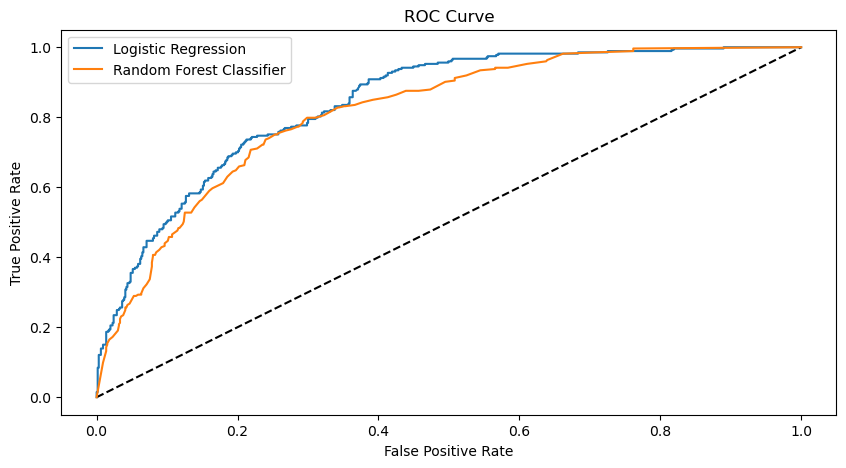

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC curve for Logistic Regression Classifier and Random Forest Classifier
log_reg = LogisticRegression()
log_reg.fit(X_train_over[selected_feat], y_train_over)
y_pred_prob1 = log_reg.predict_proba(X_test[selected_feat])[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_over[selected_feat], y_train_over)
y_pred_prob2 = rf_clf.predict_proba(X_test[selected_feat])[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

plt.figure(figsize=(10, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


* The ROC curve illustrates the true positive rate against the false positive rate of our classifier.
* The best performing models will have a curve that hugs the upper left of the graph, which is the the random forest classifier in this case. 

# Explainable AI (XAI)

Shap values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value. 

* SHAP Summary plot: The summary plot shows the most important features in our data set, ordered by the sum of SHAP value magnitudes over all samples. The color represents the feature value (red high, blue low). This reveals for example that a high Contract_Month-to-month implies a higher probability of churn.

* Bee Swarm plot: The bee swarm plot shows the individual data points for the top features. The x-axis is the SHAP value of that feature scaled to be between 0 (blue) and 1 (red). This reveals for example that a high MonthlyCharges implies a higher probability of churn.

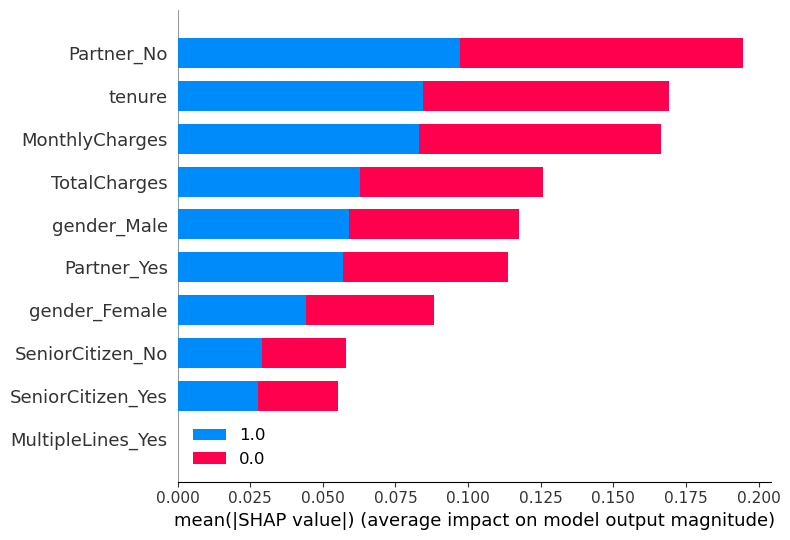

In [119]:
import shap 


explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,plot_type='bar',max_display=10,class_names=rf_clf.classes_)

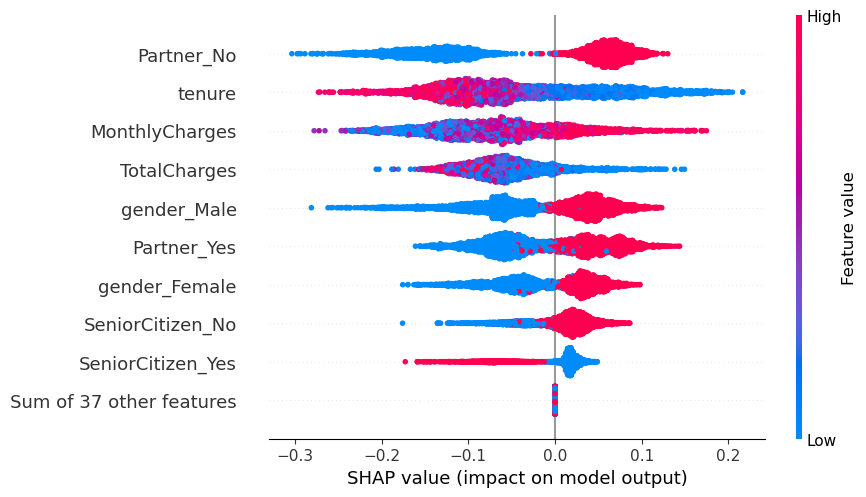

In [120]:
explainer = shap.TreeExplainer(rf_clf)
shap_values1 = explainer(X)
shap_values1.values = shap_values1.values[:,:,1]
shap_values1.base_values = shap_values1.base_values[:,1]

shap.plots.beeswarm(shap_values1)

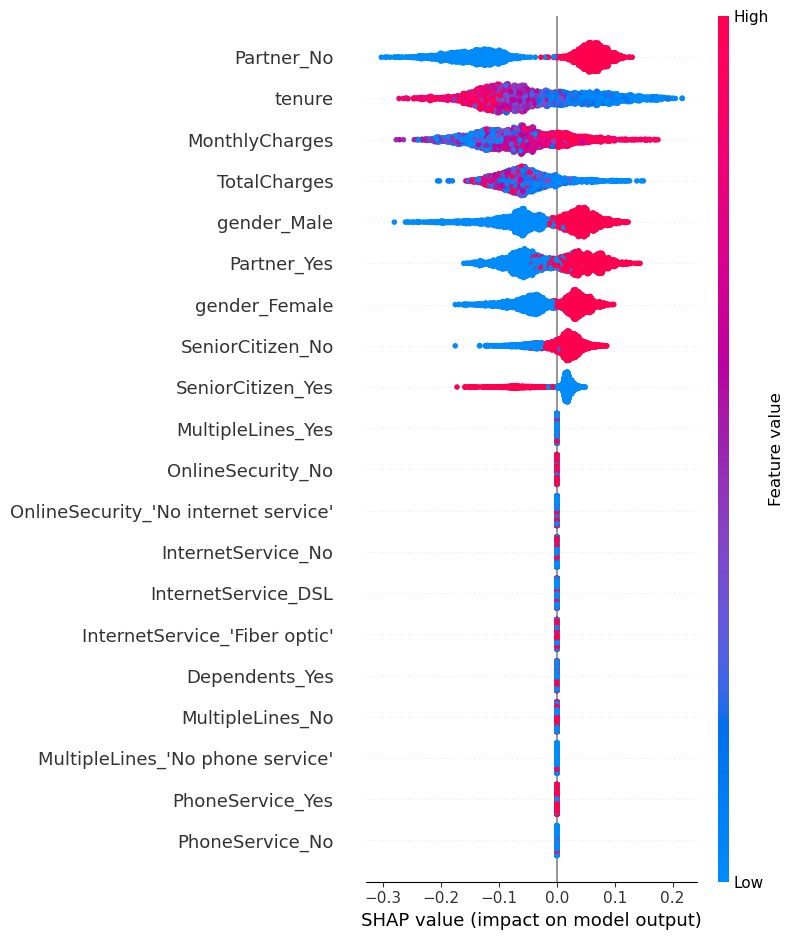

In [121]:
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_train, approximate=False, check_additivity=False)
shap.summary_plot(shap_values[1], X_train)